# Load Data and Initial Inspection

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\kiran\\Desktop\\infosys Intern\\final_adjusted_crowd_dataset.csv")

# Display first few rows to understand the structure
data.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


# Check for Missing Values, Duplicates, and Data Types

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check data types to ensure compatibility
print("\nData Types:\n", data.dtypes)


Missing values in each column:
 Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0
label        0
dtype: int64
Number of duplicate rows: 3

Data Types:
 Longitude    float64
Latitude     float64
Speed        float64
Distance     float64
Time          object
Acc X        float64
Acc Y        float64
Acc Z        float64
Heading      float64
gyro_x       float64
gyro_y       float64
gyro_z       float64
label          int64
dtype: object


# Identifying Noise and Planning Smoothing Techniques

In [3]:
import numpy as np

# Calculating summary statistics for relevant sensor columns
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
summary_statistics = data[sensor_columns].describe()
print("\nSummary Statistics for Sensor Readings:\n", summary_statistics)


Summary Statistics for Sensor Readings:
               Acc X         Acc Y         Acc Z        gyro_x        gyro_y  \
count  14249.000000  14249.000000  14249.000000  14249.000000  14249.000000   
mean      -0.001188      0.180173     -0.023520     -0.001316     -0.006517   
std        1.030887      0.837186      1.768632      0.141024      0.087841   
min       -8.805807     -8.476646    -17.320633     -2.062668     -0.571912   
25%       -0.379379     -0.126768     -0.701353     -0.046690     -0.033272   
50%       -0.013090      0.167153     -0.025562     -0.002219     -0.005783   
75%        0.362470      0.478696      0.674680      0.044939      0.021706   
max       10.488632     11.013258     19.725800      1.611687      0.599585   

             gyro_z  
count  14249.000000  
mean      -0.003200  
std        0.068010  
min       -0.666047  
25%       -0.027224  
50%       -0.002179  
75%        0.024088  
max        0.542856  


# Implement Smoothing Using Rolling Mean

In [4]:
# Applying a rolling window to smooth out sensor readings (window size of 5 as an example)
data[sensor_columns] = data[sensor_columns].rolling(window=5, min_periods=1).mean()

# View smoothed data
data[sensor_columns].head(10)


,Acc X,Acc Y,Acc Z,gyro_x,gyro_y,gyro_z
0,0.046402,-0.137178,-0.282934,-0.036306,-0.008226,-0.023416
1,-0.045288,0.114032,-0.087022,-0.000265,-0.008837,-0.006923
2,-0.045310,0.041574,-0.236343,-0.004134,-0.015149,-0.003462
3,0.026540,0.049371,-0.264857,-0.007595,-0.010670,-0.003869
4,-0.024815,0.041850,-0.310702,-0.003808,-0.007860,-0.001792
5,-0.017608,0.069315,-0.259768,-0.002219,-0.005539,0.002851
6,-0.001486,0.018076,-0.379926,-0.000876,-0.003706,0.004195
7,0.045347,0.027772,-0.380317,0.001568,0.002525,0.003339
8,-0.053382,0.090017,-0.210147,0.004622,0.002036,0.001385
9,0.008598,0.160901,-0.163930,-0.002586,0.002891,0.000529


# Time-Series Visualization of Sensor Data

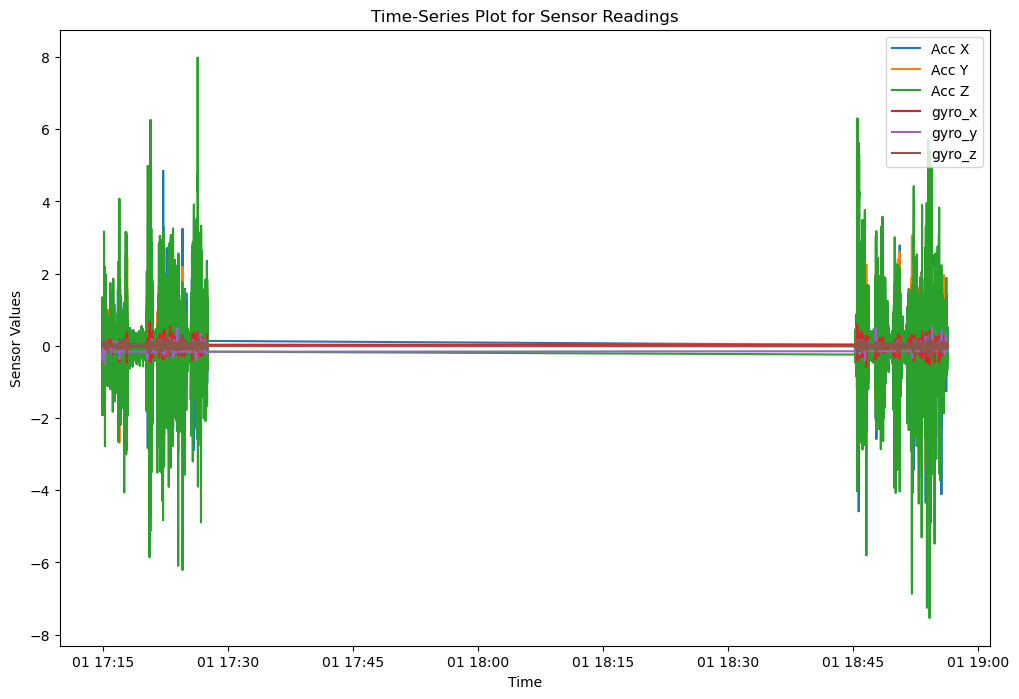

In [5]:
import matplotlib.pyplot as plt

# Convert the 'Time' column to datetime (assuming 'Time' is in 'HH-MM-SS' format)
data['Time'] = pd.to_datetime(data['Time'], format='%H-%M-%S')

# Plotting time-series data for sensor readings
plt.figure(figsize=(12, 8))

for col in sensor_columns:
    plt.plot(data['Time'], data[col], label=col)

plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.title('Time-Series Plot for Sensor Readings')
plt.legend(loc='upper right')
plt.show()


# Generating a Report Summary

In [7]:
# Function to format and print the report summary in a clearer way
def print_report(report):
    print("\n--- Report Summary ---\n")
    
    print("1. Missing Values:")
    for key, value in report["Missing Values"].items():
        print(f"   - {key}: {value}")
    
    print("\n2. Number of Duplicates:")
    print(f"   - {report['Number of Duplicates']} duplicate rows")

    print("\n3. Summary Statistics:")
    for sensor, stats in report["Summary Statistics"].items():
        print(f"   - {sensor}:")
        for stat, value in stats.items():
            print(f"      {stat.capitalize()}: {value}")

    print("\n4. Notes:")
    print(f"   - {report['Note']}")

# Run the function to display the report summary
print_report(report)


--- Report Summary ---

1. Missing Values:
   - Longitude: 0
   - Latitude: 0
   - Speed: 0
   - Distance: 0
   - Time: 0
   - Acc X: 0
   - Acc Y: 0
   - Acc Z: 0
   - Heading: 0
   - gyro_x: 0
   - gyro_y: 0
   - gyro_z: 0
   - label: 0

2. Number of Duplicates:
   - 3 duplicate rows

3. Summary Statistics:
   - Acc X:
      Count: 14249.0
      Mean: -0.0011880672891430315
      Std: 1.030886678266397
      Min: -8.805807
      25%: -0.37937883
      50%: -0.013089776
      75%: 0.3624705
      Max: 10.488632
   - Acc Y:
      Count: 14249.0
      Mean: 0.1801733197988641
      Std: 0.8371860054996473
      Min: -8.476646
      25%: -0.12676811
      50%: 0.16715336
      75%: 0.47869587
      Max: 11.013258
   - Acc Z:
      Count: 14249.0
      Mean: -0.023519970518492427
      Std: 1.7686323245439963
      Min: -17.320633
      25%: -0.7013532
      50%: -0.025561735
      75%: 0.67468005
      Max: 19.7258
   - gyro_x:
      Count: 14249.0
      Mean: -0.0013161663880272335
   